# Metis Challenge V2.0 -  Extracting D3.js GitHub Repo Commit History

## by Saeed Nusri

The following notebook presents the code that was used to extract the D3 github repo commit history for the past year of 2016.

This notebook further explores the commit history for extra credit.

Once the commit history was obtained pandas was used to tranform and aggregate the data accordingly.

In [3]:
import pandas as pd
import numpy as np
import datetime

from matplotlib import pyplot as plt

In [4]:
commithist = pd.read_json("commithistory.json")
commithist.head()

,author,commit,date,message
0,Mike Bostock <mbostock@gmail.com>,f797dfe883ee510f32acadf3ab8be736146e5927,2016-11-23 01:31:45,4.4.0
1,Mike Bostock <mbostock@gmail.com>,748cf5245fe1c74a41d86be565a59bd851b91714,2016-11-23 01:13:48,Update-dependencies
2,Peter Lenahan <peter.lenahan@synacor.com>,4a62ae5180acf3998b3a63eceaaf3d2443ecfc54,2016-11-22 02:53:45,Correct-typos-in-d3-axis-documentation-axisTig...
3,Mike van Rossum <mike@mikevanrossum.nl>,667ce0d7f846869d351c3e51602ec659b418a7f8,2016-11-04 14:55:27,an-Y-shape-symbol-a-Y-shape
4,Mike van Rossum <mike@mikevanrossum.nl>,9ec65086df29e5ba093ddb3e80853d1a1474ee16,2016-11-04 14:34:27,fixed-wye-decription


In [5]:
commithist['date'] = pd.to_datetime(commithist['date'])

commithist["date"].dtype

dtype('<M8[ns]')

In [6]:
sortedCommitW = commithist.groupby(['author', pd.Grouper(key='date', freq='W-MON')])['commit'].sum().reset_index().sort_values('date')
print (sortedCommitW)

                                           author       date  \
52                 Stef Walter <stefw@redhat.com> 2015-09-14   
9               Mike Bostock <mbostock@gmail.com> 2016-01-04   
10              Mike Bostock <mbostock@gmail.com> 2016-01-11   
4         Fernando Lores <flores@lendingclub.com> 2016-01-11   
11              Mike Bostock <mbostock@gmail.com> 2016-01-18   
12              Mike Bostock <mbostock@gmail.com> 2016-01-25   
13              Mike Bostock <mbostock@gmail.com> 2016-02-01   
14              Mike Bostock <mbostock@gmail.com> 2016-02-08   
15              Mike Bostock <mbostock@gmail.com> 2016-02-15   
16              Mike Bostock <mbostock@gmail.com> 2016-02-22   
17              Mike Bostock <mbostock@gmail.com> 2016-02-29   
18              Mike Bostock <mbostock@gmail.com> 2016-03-07   
19              Mike Bostock <mbostock@gmail.com> 2016-03-14   
20              Mike Bostock <mbostock@gmail.com> 2016-03-21   
8            Lukas Appelhans <l.appelhan

In [7]:
sortedCommitW['TotalCommitsInTheWeek'] = sortedCommitW.index

In [8]:
sortedCommitW.reset_index(level = 0, inplace=True)
del sortedCommitW["index"]
sortedCommitW

,author,date,commit,TotalCommitsInTheWeek
0,Stef Walter <stefw@redhat.com>,2015-09-14,17cc510c66123b678509d2c8e4847a01db710176,52
1,Mike Bostock <mbostock@gmail.com>,2016-01-04,8ff4bedd44ccaab898222afe42ea15ac8ebd4a66b55d7a...,9
2,Mike Bostock <mbostock@gmail.com>,2016-01-11,bb9c4c6913f9b22d0dcf1959ea4afe3d648c5e44af56c8...,10
3,Fernando Lores <flores@lendingclub.com>,2016-01-11,b5dc7e27c0247cfff955bfcf9b0b8309c805421d,4
4,Mike Bostock <mbostock@gmail.com>,2016-01-18,8d83cca7f705c4bae291be943e133291c6d34dc202d258...,11
5,Mike Bostock <mbostock@gmail.com>,2016-01-25,c6fcd617f0708d9bd83aac7fa2242241fd1d660c0f91ff...,12
6,Mike Bostock <mbostock@gmail.com>,2016-02-01,bf0f88b6bc67faff0a95b89f4d911fd2cfc08fdd644a03...,13
7,Mike Bostock <mbostock@gmail.com>,2016-02-08,23e383f4a88683a2e8c4c893731d0e5e110683e3295901...,14
8,Mike Bostock <mbostock@gmail.com>,2016-02-15,7504df592f2a0eac00bb4c7b2200707bcf8dd543614680...,15
9,Mike Bostock <mbostock@gmail.com>,2016-02-22,4e3ace7b49f2e972cce61e46658479e964a516efacc65d...,16


In [9]:
g = sortedCommitW.groupby("date").sum().reset_index()
g.max()

date                     2016-11-28 00:00:00
TotalCommitsInTheWeek                     99
dtype: object

In [10]:
g

,date,TotalCommitsInTheWeek
0,2015-09-14,52
1,2016-01-04,9
2,2016-01-11,14
3,2016-01-18,11
4,2016-01-25,12
5,2016-02-01,13
6,2016-02-08,14
7,2016-02-15,15
8,2016-02-22,16
9,2016-02-29,17


Hence from the EDA, most number of commits were made on the week of 2016-11-28. These were cumulatively 99. The number of commits for every week for 2016 has been visualized.

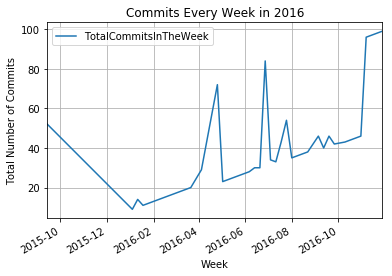

In [11]:
%matplotlib inline
g.plot("date", "TotalCommitsInTheWeek")
plt.xlabel('Week')
plt.ylabel('Total Number of Commits')
plt.title('Commits Every Week in 2016')
plt.grid(True)

To see which weekday had the most commits, the commits were aggragated over weekdays.

In [14]:

commithist['weekday'] = commithist['date'].dt.weekday_name
commithist["weekday"] = commithist["weekday"].astype('O')
commithist


,author,commit,date,message,weekday
0,Mike Bostock <mbostock@gmail.com>,f797dfe883ee510f32acadf3ab8be736146e5927,2016-11-23 01:31:45,4.4.0,Wednesday
1,Mike Bostock <mbostock@gmail.com>,748cf5245fe1c74a41d86be565a59bd851b91714,2016-11-23 01:13:48,Update-dependencies,Wednesday
2,Peter Lenahan <peter.lenahan@synacor.com>,4a62ae5180acf3998b3a63eceaaf3d2443ecfc54,2016-11-22 02:53:45,Correct-typos-in-d3-axis-documentation-axisTig...,Tuesday
3,Mike van Rossum <mike@mikevanrossum.nl>,667ce0d7f846869d351c3e51602ec659b418a7f8,2016-11-04 14:55:27,an-Y-shape-symbol-a-Y-shape,Friday
4,Mike van Rossum <mike@mikevanrossum.nl>,9ec65086df29e5ba093ddb3e80853d1a1474ee16,2016-11-04 14:34:27,fixed-wye-decription,Friday
5,Mike Bostock <mbostock@gmail.com>,5506719c33643fd772610ec956c6accdc73bfea4,2016-11-02 22:32:05,Update-README,Wednesday
6,Mike Bostock <mbostock@gmail.com>,2d5a1eeafd2f2f25f16df970b30f6d751061ef77,2016-10-27 18:53:45,Update-the-API-Reference,Thursday
7,Mike Bostock <mbostock@gmail.com>,33da151d2437941ea0767f27b6a83668ea5f21bb,2016-10-27 18:43:19,4.3.0,Thursday
8,Mike Bostock <mbostock@gmail.com>,635865c959bb49b54691bdf0dff03eb62e1b5002,2016-10-27 18:43:10,Update-dependencies,Thursday
9,Mike Bostock <mbostock@gmail.com>,ec3fa7239e48e84873de7b034692389bb48bcb5e,2016-10-20 17:51:07,Merge-branch-master-of-github.com-d3-d3,Thursday


In [15]:
commithist["weekday"].dtype

dtype('O')

In [16]:
wd = commithist.groupby(['weekday'])['author'].count().sort_values(ascending = False)

Wednesdays had the highest commits throughout 2016.

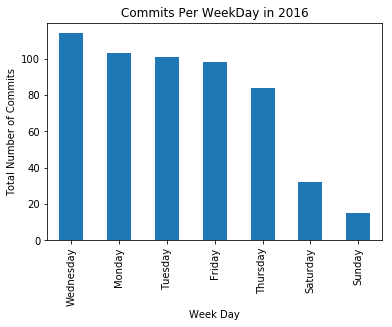

In [17]:
%matplotlib inline
wd.plot.bar()
plt.xlabel('Week Day')
plt.ylabel('Total Number of Commits')
plt.title('Commits Per WeekDay in 2016')


Also, the commits were aggregated over the 12 months.

In [18]:
commithist['Month'] = commithist['date'].dt.strftime('%b')
commithist["Month"] = commithist["Month"].astype('O')
commithist

,author,commit,date,message,weekday,Month
0,Mike Bostock <mbostock@gmail.com>,f797dfe883ee510f32acadf3ab8be736146e5927,2016-11-23 01:31:45,4.4.0,Wednesday,Nov
1,Mike Bostock <mbostock@gmail.com>,748cf5245fe1c74a41d86be565a59bd851b91714,2016-11-23 01:13:48,Update-dependencies,Wednesday,Nov
2,Peter Lenahan <peter.lenahan@synacor.com>,4a62ae5180acf3998b3a63eceaaf3d2443ecfc54,2016-11-22 02:53:45,Correct-typos-in-d3-axis-documentation-axisTig...,Tuesday,Nov
3,Mike van Rossum <mike@mikevanrossum.nl>,667ce0d7f846869d351c3e51602ec659b418a7f8,2016-11-04 14:55:27,an-Y-shape-symbol-a-Y-shape,Friday,Nov
4,Mike van Rossum <mike@mikevanrossum.nl>,9ec65086df29e5ba093ddb3e80853d1a1474ee16,2016-11-04 14:34:27,fixed-wye-decription,Friday,Nov
5,Mike Bostock <mbostock@gmail.com>,5506719c33643fd772610ec956c6accdc73bfea4,2016-11-02 22:32:05,Update-README,Wednesday,Nov
6,Mike Bostock <mbostock@gmail.com>,2d5a1eeafd2f2f25f16df970b30f6d751061ef77,2016-10-27 18:53:45,Update-the-API-Reference,Thursday,Oct
7,Mike Bostock <mbostock@gmail.com>,33da151d2437941ea0767f27b6a83668ea5f21bb,2016-10-27 18:43:19,4.3.0,Thursday,Oct
8,Mike Bostock <mbostock@gmail.com>,635865c959bb49b54691bdf0dff03eb62e1b5002,2016-10-27 18:43:10,Update-dependencies,Thursday,Oct
9,Mike Bostock <mbostock@gmail.com>,ec3fa7239e48e84873de7b034692389bb48bcb5e,2016-10-20 17:51:07,Merge-branch-master-of-github.com-d3-d3,Thursday,Oct


In [19]:
m = commithist.groupby(['Month'])['author'].count().sort_values(ascending = False)

In [20]:
m

Month
Jun    279
Jan    100
Feb     52
May     28
Mar     16
Jul     16
Sep     14
Aug     14
Apr     12
Oct     10
Nov      6
Name: author, dtype: int64

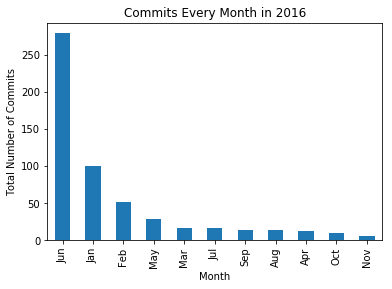

In [21]:
%matplotlib inline
m.plot.bar()
plt.xlabel('Month')
plt.ylabel('Total Number of Commits')
plt.title('Commits Every Month in 2016')


June observed the most commits.

In [22]:
author = commithist.groupby(['author'])['commit'].count().sort_values(ascending = False)

In [23]:
author

author
Mike Bostock <mbostock@gmail.com>                529
Curran Kelleher <curran.kelleher@gmail.com>        3
Minwei Xu <faceswilliam@gmail.com>                 2
Mike van Rossum <mike@mikevanrossum.nl>            2
william-pan <william49@qq.com>                     1
mpersing <potroast42@gmail.com>                    1
Stef Walter <stefw@redhat.com>                     1
Peter Lenahan <peter.lenahan@synacor.com>          1
Lukas Appelhans <l.appelhans@gmx.de>               1
Jeferson Koslowski <jef.koslowski@gmail.com>       1
Gordon Woodhull <gordon@woodhull.com>              1
Fábio Silva <fabio.fernando.osilva@gmail.com>      1
Fernando Lores <flores@lendingclub.com>            1
Dev-Lan <lange604@umn.edu>                         1
Barrie Treloar <baerrach@gmail.com>                1
Name: commit, dtype: int64

It was also seen Mike Bostock, the creater of D3.js, had the most commits overall.

In [24]:
commit2017 = pd.read_json("commithistory2.json")
commit2017

,author,commit,date,message
0,Mike Bostock <mbostock@gmail.com>,41dad6467234c0decf68608a760e46a882d5b80e,2017-09-03 18:25:46,4.10.2
1,Mike Bostock <mbostock@gmail.com>,183ba0bfbb45196f4e1fa0088faf9bc1239e30d0,2017-09-03 18:25:39,Update-d3-timer
2,Mike Bostock <mbostock@gmail.com>,012041cd9fd81e268602afdecafc5ea6bfa13dc0,2017-09-02 22:31:45,4.10.1
3,Mike Bostock <mbostock@gmail.com>,39154c570116ca4c6972a7fa2d29e0b82b187728,2017-09-02 22:28:43,Update-dependencies
4,Mike Bostock <mbostock@gmail.com>,5524246f04670905904873eb6692159315a111cc,2017-09-02 22:24:38,Remove-package-lock.json
5,Mike Bostock <mbostock@gmail.com>,62faf7d0fd38708cc17ac90cc1dc9a1af22f798e,2017-07-14 21:03:03,4.10.0
6,Mike Bostock <mbostock@gmail.com>,5d399966bdbe58f0e5249c28b92454df0946fa39,2017-07-14 21:02:38,Update-dependencies
7,Mike Bostock <mbostock@gmail.com>,e6cab562e81d4847cc8e581f7ae638e86bac3b34,2017-05-16 14:50:13,4.9.1
8,Mike Bostock <mbostock@gmail.com>,e32895d511198a7ed0e505fb1b8bb484cf614460,2017-05-16 14:50:09,Update-dependencies
9,Mike Bostock <mbostock@gmail.com>,cc59d86abd2eab20f2641c1eca62e3152a0f7766,2017-05-15 19:20:34,4.9.0


In [25]:
commit2017['date'] = pd.to_datetime(commit2017['date'])

commit2017['weekday'] = commit2017['date'].dt.weekday_name
commit2017["weekday"] = commit2017["weekday"].astype('O')

wd2017 = commit2017.groupby(['weekday'])['author'].count().sort_values(ascending = False)
wd2017


weekday
Friday       12
Sunday        8
Saturday      8
Thursday      6
Monday        6
Wednesday     4
Tuesday       4
Name: author, dtype: int64

As seen, comparatively lesser commits were made in 2017. Also Friday seemed liked the weekday with the most commits.